In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Converting string values into ints

In [6]:
# Converting hotel types from str to int

df.hotel = df.hotel.map({'City Hotel':0, 'Resort Hotel':1})
df.hotel.unique()

array([1, 0], dtype=int64)

In [7]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [8]:
# Creating a timeseries date and extraction of weekdays

# df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [9]:
# df['weekday'] = df['date'].dt.weekday

In [10]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [11]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [12]:
# Converting country from str to int using LabelEncoder

df.country.fillna(df.country.mode().to_string(), inplace=True)    # Filling Null values with the most common value in the dataset - here PRT for Portugal
le = LabelEncoder()
df.country = le.fit_transform(df.country)
df.country.unique()

array([136,  60, 170,  52,  77,  57,   0, 140, 125, 128,   7, 134,  44,
        16,  30,  35,  67,  82, 124,  47, 141, 155,  12,  53,  43,  26,
        55, 114,  28, 101, 154,   4,  76,  32, 108, 104, 167, 149, 102,
       135, 150,  31,  13,  24, 100, 163, 175,   2,  81,  41, 176,  38,
       177,  49,  92,  39,  73,   6, 162,  83,  72,  70,  78,  61,   5,
        64, 169,  84,  29,  42,  36,  62,  93, 122, 107, 172, 153,  56,
        87, 129,  74,  95, 132, 145, 156,  14,  21, 127, 159,  48, 109,
       118,   8,  86,  99,  40,  34,  23, 116,  37, 152, 166,  20,  33,
        85, 157, 146,  15, 143, 174, 133, 139,  51, 131, 111, 117,  50,
       106,  80, 171, 126,  22, 103, 158, 164,  45, 151,  91,  54,  79,
        71, 142,  89, 105,  19,  75, 160, 123,  17, 173, 165,  59,  63,
       161,  65,  88,  98,  66, 113, 168, 119,  58, 112, 130,  18,  96,
       110, 120,  25, 137,  27,   1,   3, 148,  46, 138,  69,  97,  10,
        68,   9, 115, 121,  90, 144,  11, 147,  94])

In [13]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [14]:
# Converting market_segment from str to int

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])
df.market_segment.unique()

array([3, 2, 6, 5, 1, 4, 7, 0])

In [15]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [16]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})
df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [17]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [18]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [19]:
# Creating a new feature: room. 
# If a guest does not get the reserved room it might raise the probability that she cancels the reservation.

df['room'] = 0
df.loc[df.reserved_room_type == df.assigned_room_type , 'room'] = 1

In [20]:
# Creating a new column: net_cancelled. It contains 1 if the guest has cancelled more bookings in the past than the number of booking she did not cancel, otherwise 0

df['net_cancelled'] = 0
df.loc[ df.previous_cancellations > df.previous_bookings_not_canceled, 'net_cancelled'] = 1


In [21]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [22]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [23]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [24]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})
df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [25]:
df.reservation_status.unique() 

# This column will not be taken into the calculation since it is almost redundand to is_cancelled which we want to predict.

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [26]:
df.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [27]:
# Filling missing values in children with the mean
df.children.fillna(round(df.children.mean()), inplace = True)

# Filling missing values with mean
df['agent'].fillna(df['agent'].mean(), inplace = True)
df['company'].fillna(df['company'].mean(), inplace = True)

# Converting unneccessary float types into int types
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [28]:
# Adults, babies and children cant be 0 at same time, so these 180 rows need to be dropped

df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

# There are still some unusual bookings left: traveling children and babies without adults

<AxesSubplot:>

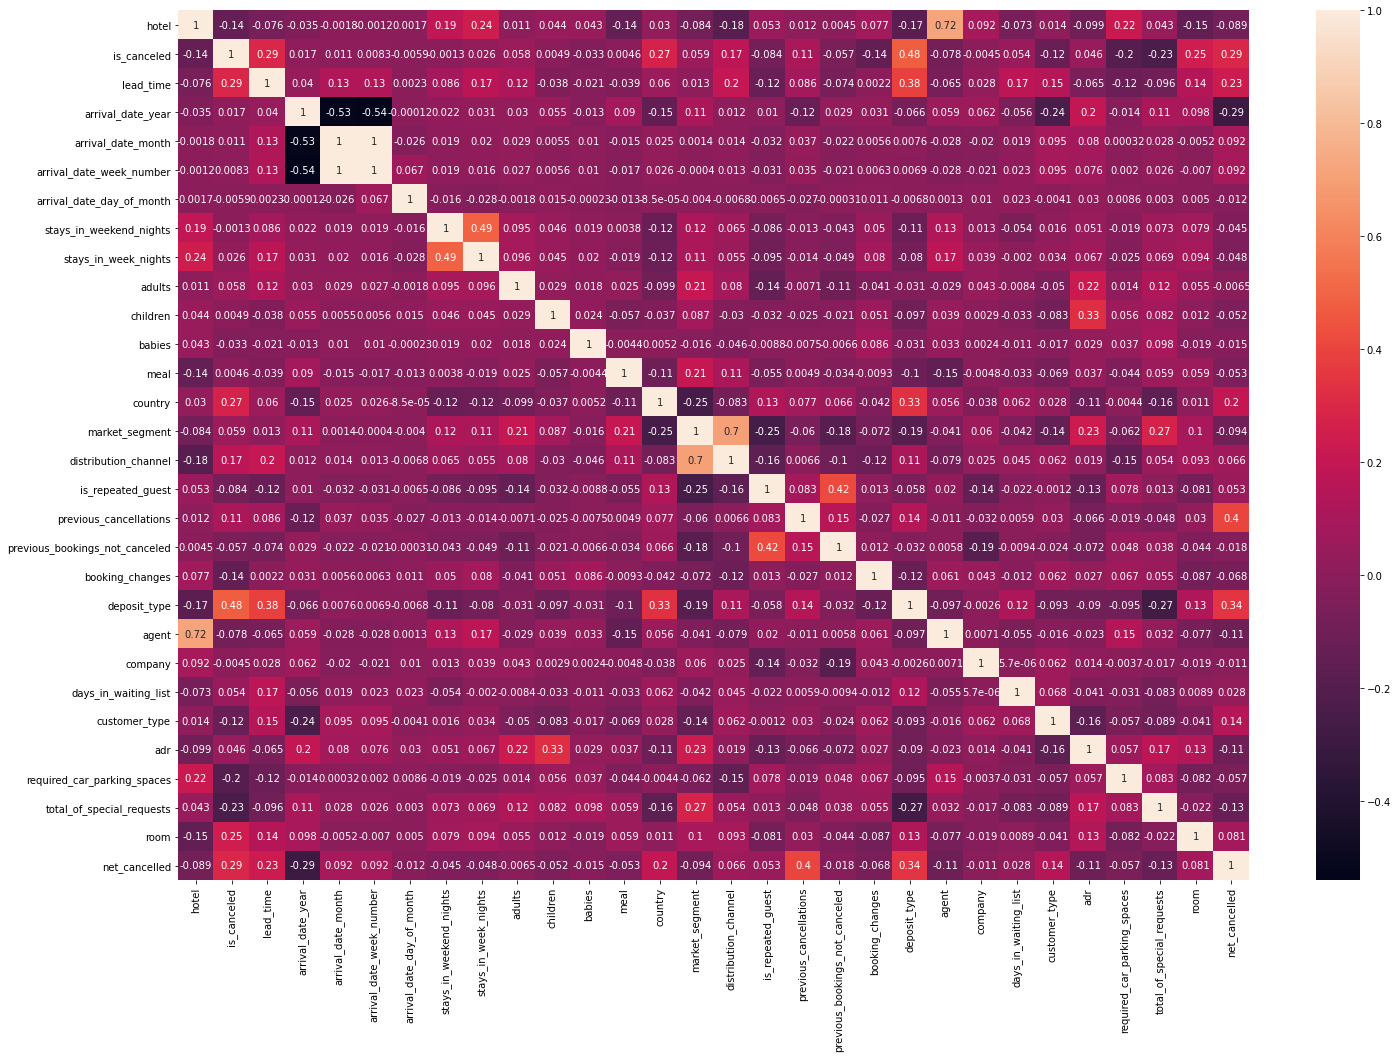

In [29]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [30]:
#Variance of the data
df.var()

hotel                                 0.223085
is_canceled                           0.233300
lead_time                         11422.361808
arrival_date_year                     0.500535
arrival_date_month                    9.546842
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
meal                                  0.801927
country                            2023.411409
market_segment                        1.602172
distribution_channel                  0.458395
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
booking_changes                       0.407688
deposit_type                          0.430259
agent        

In [31]:
# Correlation depending on is_canceled

df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
deposit_type                      0.480483
net_cancelled                     0.292888
lead_time                         0.292876
country                           0.272496
room                              0.246768
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
distribution_channel              0.171416
booking_changes                   0.144832
hotel                             0.137082
customer_type                     0.122024
previous_cancellations            0.110139
is_repeated_guest                 0.083745
agent                             0.078010
market_segment                    0.059419
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_dat

In [32]:
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'reserved_room_type', 'assigned_room_type', 
             'previous_cancellations', 'previous_bookings_not_canceled'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [33]:
# How many uncanceled (0) or canceled (1) records does the dataset contain?

print('Distribution is canceled (1) or not (0): \n' + str(pd.Series(y).value_counts()))
print('In Percent: \n' + str(pd.Series(y).value_counts() / pd.Series(y).count() * 100))

Distribution is canceled (1) or not (0): 
0    75011
1    44199
dtype: int64
In Percent: 
0    62.923412
1    37.076588
dtype: float64


In [34]:
# The dataset is obviously very imbalanced. 
# A prediction with a high accuracy and Kappa is therefor only possible with a lot of try and error in feature optimization. 
# A possible solution: Oversampling!

In [35]:
# Oversampling: Balances the imbalanced dataset out by creating more samples with "canceled data" for better prediction results. 

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [36]:
# Scaling 

X_scaled = StandardScaler().fit_transform(X_resampled)

# Training

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size = 0.2, random_state = 0)

In [37]:
# After Oversampling

print('Distribution after Oversampling: \n' + str(pd.Series(y_resampled).value_counts()))

Distribution after Oversampling: 
1    75011
0    75011
dtype: int64


In [38]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1500).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, model_rf_prediction)

conf_rf = confusion_matrix(y_test, model_rf_prediction)
clf_report_rf = classification_report(y_test, model_rf_prediction)

print(f"Accuracy Score of Random Forest is : {accuracy_rf}")
print(f"Confusion Matrix : \n{conf_rf}")
print(f"Classification Report : \n{clf_report_rf}")

Accuracy Score of Random Forest is : 0.9323446092317947
Confusion Matrix : 
[[13776  1242]
 [  788 14199]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     15018
           1       0.92      0.95      0.93     14987

    accuracy                           0.93     30005
   macro avg       0.93      0.93      0.93     30005
weighted avg       0.93      0.93      0.93     30005



In [39]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.8646933044160838

In [40]:
# COMPARISON:
# Checking the settings for the hotel types separately (without oversampling)

In [41]:
df_city = df[df.hotel == 0]
df_resort = df[df.hotel == 1]

In [42]:
X_city = df_city.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'reserved_room_type', 'assigned_room_type', 
             'previous_cancellations', 'previous_bookings_not_canceled'], axis = 1)
y_city = df_city['is_canceled']
y_city = np.array(y_city)

X_resort = df_resort.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'reserved_room_type', 'assigned_room_type', 
             'previous_cancellations', 'previous_bookings_not_canceled'], axis = 1)
y_resort = df_resort['is_canceled']
y_resort = np.array(y_resort)

In [43]:
# Scaling 

X_city_scaled = StandardScaler().fit_transform(X_city)
X_resort_scaled = StandardScaler().fit_transform(X_resort)

# Training

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_city_scaled, y_city, test_size = 0.2, random_state = 0)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resort_scaled, y_resort, test_size = 0.2, random_state = 0)

In [44]:
# Random Forest - City Hotels
model_rf_city = RandomForestClassifier(n_estimators=1500).fit(X_train_c, y_train_c)   
model_rf_prediction_city = model_rf_city.predict(X_test_c)
accuracy_rf_city = accuracy_score(y_test_c, model_rf_prediction_city)

conf_rf_city = confusion_matrix(y_test_c, model_rf_prediction_city)
clf_report_rf_city = classification_report(y_test_c, model_rf_prediction_city)

print(f"Accuracy Score of Random Forest is : {accuracy_rf_city}")
print(f"Confusion Matrix : \n{conf_rf_city}")
print(f"Classification Report : \n{clf_report_rf_city}")

Accuracy Score of Random Forest is : 0.8895976757405419
Confusion Matrix : 
[[8639  645]
 [1103 5446]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9284
           1       0.89      0.83      0.86      6549

    accuracy                           0.89     15833
   macro avg       0.89      0.88      0.88     15833
weighted avg       0.89      0.89      0.89     15833



In [45]:
kappa_rf_city = cohen_kappa_score(y_test_c, model_rf_prediction_city)
kappa_rf_city

0.7700351681600681

In [46]:
# Random Forest - Resort Hotels
model_rf_resort = RandomForestClassifier(n_estimators=1500).fit(X_train_r, y_train_r)
model_rf_prediction_resort = model_rf_resort.predict(X_test_r)
accuracy_rf_resort = accuracy_score(y_test_r, model_rf_prediction_resort)

conf_rf_resort = confusion_matrix(y_test_r, model_rf_prediction_resort)
clf_report_rf_resort = classification_report(y_test_r, model_rf_prediction_resort)

print(f"Accuracy Score of Random Forest is : {accuracy_rf_resort}")
print(f"Confusion Matrix : \n{conf_rf_resort}")
print(f"Classification Report : \n{clf_report_rf_resort}")

Accuracy Score of Random Forest is : 0.9116104868913858
Confusion Matrix : 
[[5473  316]
 [ 392 1829]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5789
           1       0.85      0.82      0.84      2221

    accuracy                           0.91      8010
   macro avg       0.89      0.88      0.89      8010
weighted avg       0.91      0.91      0.91      8010



In [47]:
kappa_rf_resort = cohen_kappa_score(y_test_r, model_rf_prediction_resort)
kappa_rf_resort

0.7771114666691821

In [48]:
# Result of the last observation:
# -------------------------------
# The feature optimization doesn't work well for the separate examination of city and resort hotels.
# The Accuracy and Kappa scores landed far below the prediction scores of the whole dataset when oversampling was used.